# Tarea - Ajuste de curvas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [4]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

### Polinomio grado 1

In [5]:
x = np.linspace(0,26,27)
y = data
m = len(x)
m

27

In [6]:
def costo_electricidad (beta, X, y):
    beta = np.reshape(beta,[2,-1])
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

In [7]:
# Construyendo la matriz
ones = np.ones([m,1]) #26 renglones y 1 columna
x_1 = np.reshape(x,[m,-1])
X = np.hstack((ones,x_1))

In [8]:
beta_inicial = np.random.rand(2) #Polinomio de grado 1 tiene dos elementos
y = np.reshape(y,[m,-1])

In [9]:
costo_electricidad(beta_inicial,X,y)

754.2160522092399

In [10]:
import scipy.optimize as opt

sol = opt.minimize(costo_electricidad, beta_inicial, args=(X,y))
sol

      fun: 2.3704889518149237
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([-2.62260437e-06, -1.18911266e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 79
      nit: 3
     njev: 23
   status: 2
  success: False
        x: array([9.11567619, 0.18667056])

### Polinomio de grado 2

In [11]:
def costo_electricidad (beta, X, y):
    beta = np.reshape(beta,[3,-1]) # Ahora beta tiene tres elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([m,1]) #26 renglones y 1 columna
x_1 = np.reshape(x,[m,-1])
x_2 = np.reshape(x**2,[m,-1])
X = np.hstack((ones,x_1,x_2))

beta_inicial = np.random.rand(3) #Polinomio de grado 2 tiene tres elementos
y = np.reshape(y,[m,-1])

In [12]:
costo_electricidad(beta_inicial,X,y)

1422247.5260060797

In [13]:
opt.minimize(costo_electricidad, beta_inicial,args=(X,y))

      fun: 0.8443845194032291
 hess_inv: array([[ 1.44227122e-01, -2.17572334e-02,  6.84184828e-04],
       [-2.17572334e-02,  4.57458458e-03, -1.64204163e-04],
       [ 6.84184828e-04, -1.64204163e-04,  6.31552750e-06]])
      jac: array([0.00000000e+00, 1.49011612e-08, 1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([9.59128645e+00, 7.25241277e-02, 4.39024721e-03])

### Polinomio de grado 3

In [14]:
def costo_electricidad (beta, X, y):
    beta = np.reshape(beta,[4,-1]) # Ahora beta tiene cuatro elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([m,1]) #26 renglones y 1 columna
x_1 = np.reshape(x,[m,-1])
x_2 = np.reshape(x**2,[m,-1])
x_3 = np.reshape(x**3,[m,-1])
X = np.hstack((ones,x_1,x_2,x_3))

beta_inicial = np.random.rand(4) #Polinomio de grado 3 tiene cuatro elementos
y = np.reshape(y,[m,-1])

In [15]:
costo_electricidad(beta_inicial,X,y)

4997872.714518987

In [16]:
opt.minimize(costo_electricidad,beta_inicial,args=(X,y))

      fun: 0.8404242001948709
 hess_inv: array([[ 2.27239738e-01, -6.41155055e-02,  4.83489084e-03,
        -1.06428427e-04],
       [-6.41155055e-02,  2.61882448e-02, -2.28212868e-03,
         5.43057658e-05],
       [ 4.83489084e-03, -2.28212868e-03,  2.13850861e-04,
        -5.32141846e-06],
       [-1.06428427e-04,  5.43057658e-05, -5.32141846e-06,
         1.36446616e-07]])
      jac: array([-6.13085181e-03,  3.55845988e-02,  5.05480759e-01,  9.95173556e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 206
      nit: 5
     njev: 39
   status: 2
  success: False
        x: array([9.56523309e+00, 8.53614279e-02, 3.14636400e-03, 3.17189193e-05])

## Gráfica

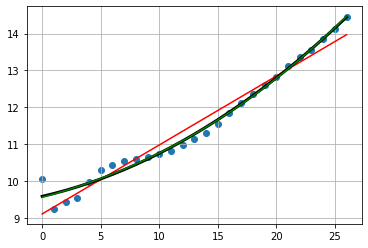

In [17]:
y_1 = 9.11567637 + 0.18667055*x #Línea roja
y_2 = 9.59128645e+00 + 7.25241240e-02*x + 4.39024861e-03*x**2 #Línea negra
y_3 = 9.56539954e+00 + 8.52899052e-02*x + 3.15265122e-03*x**2 + 3.15634425e-05*x**3 #Línea verde

%matplotlib inline
plt.figure()
plt.scatter(x,y)
plt.plot(x,y_1, 'r')
plt.plot(x,y_2, 'k', linewidth =3)
plt.plot(x,y_3, 'g')
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

# 1)

In [71]:
data = pd.read_csv("population_data.csv")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [72]:
x = np.linspace(0,65,66)
y = data.Poblacion.tolist()
y

[28296,
 29110,
 29980,
 30904,
 31880,
 32906,
 33978,
 35095,
 36253,
 37448,
 38677,
 39939,
 41234,
 42564,
 43931,
 45339,
 46784,
 48264,
 49788,
 51361,
 52988,
 54669,
 56396,
 58156,
 59931,
 61708,
 63486,
 65261,
 67013,
 68715,
 70353,
 71916,
 73416,
 74880,
 76351,
 77859,
 79410,
 80999,
 82635,
 84327,
 86077,
 87890,
 89758,
 91654,
 93542,
 95393,
 97202,
 98969,
 100679,
 102317,
 103874,
 105340,
 106724,
 108056,
 109382,
 110732,
 112117,
 113530,
 114968,
 116423,
 114255,
 115683,
 117054,
 118395,
 119713,
 121005]

### Polinomio grado 1

In [73]:
size = len(y)
size

66

In [74]:
def funcion (beta, X, y):
    beta = np.reshape(beta,[2,-1]) # Ahora beta tiene dos elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([size,1]) #66 renglones y 1 columna
x_1 = np.reshape(x,[size,-1])
X = np.hstack((ones,x_1))

beta_inicial = np.random.rand(2) #Polinomio de grado 1 tiene dos elementos
y = np.reshape(y,[size,-1])

In [75]:
funcion(beta_inicial,X,y)

421560188103.0311

In [76]:
opt.minimize(funcion,beta_inicial,args=(X,y))

      fun: 212137169.58482027
 hess_inv: array([[ 2.96291180e-02, -6.78527656e-04],
       [-6.78527656e-04,  2.08768815e-05]])
      jac: array([ 0., -4.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 123
      nit: 6
     njev: 38
   status: 2
  success: False
        x: array([24138.06483864,  1543.97227718])

### Polinomio grado 2

In [77]:
def funcion (beta, X, y):
    beta = np.reshape(beta,[3,-1]) # Ahora beta tiene tres elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([size,1]) #66 renglones y 1 columna
x_1 = np.reshape(x,[size,-1])
x_2 = np.reshape(x**2,[size,-1])
X = np.hstack((ones,x_1,x_2))

beta_inicial = np.random.rand(3) #Polinomio de grado 2 tiene tres elementos
y = np.reshape(y,[size,-1])

In [78]:
funcion(beta_inicial,X,y)

408930401488.327

In [79]:
opt.minimize(funcion,beta_inicial,args=(X,y))

      fun: 210941621.62686455
 hess_inv: array([[ 6.40113835e-02, -3.90661584e-03,  4.96892759e-05],
       [-3.90661584e-03,  3.23863185e-04, -4.66324980e-06],
       [ 4.96892759e-05, -4.66324980e-06,  7.17689561e-08]])
      jac: array([0., 2., 0.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 194
      nit: 8
     njev: 46
   status: 2
  success: False
        x: array([2.44254385e+04, 1.51702248e+03, 4.14654601e-01])

### Polinomio de grado 3

In [80]:
def funcion (beta, X, y):
    beta = np.reshape(beta,[4,-1]) # Ahora beta tiene cuatro elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([size,1]) #66 renglones y 1 columna
x_1 = np.reshape(x,[size,-1])
x_2 = np.reshape(x**2,[size,-1])
x_3 = np.reshape(x**3,[size,-1])
X = np.hstack((ones,x_1,x_2,x_3))

beta_inicial = np.random.rand(4) #Polinomio de grado 3 tiene cuatro elementos
y = np.reshape(y,[size,-1])

In [81]:
funcion(beta_inicial,X,y)

148022208320.3791

In [82]:
opt.minimize(funcion,beta_inicial,args=(X,y))

      fun: 25240442.638538513
 hess_inv: array([[ 4.10375137e-02, -3.47288733e-06, -7.10359082e-05,
         1.01093178e-06],
       [-3.47288733e-06,  3.96373252e-07, -1.21329151e-08,
         1.08392850e-10],
       [-7.10359082e-05, -1.21329151e-08,  1.98599731e-07,
        -3.09137360e-09],
       [ 1.01093178e-06,  1.08392850e-10, -3.09137360e-09,
         4.94135758e-11]])
      jac: array([ -0.25,  -0.5 ,  -5.25, -11.75])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 105
      nit: 9
     njev: 21
   status: 2
  success: False
        x: array([ 2.84777372e+04,  7.39081276e+02,  3.05648091e+01, -3.09231314e-01])

## Gráfico

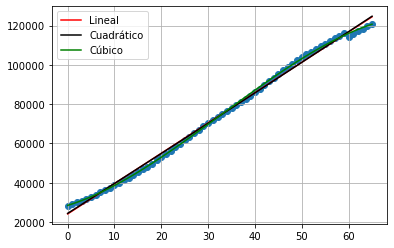

In [83]:
y_1 = 24137.95765803 + 1543.97473038*x
y_2 = 2.44255372e+04 + 1.51701643e+03*x + 4.14731712e-01*x**2
y_3 = 2.84777602e+04 + 7.39078763e+02*x + 3.05648843e+01*x**2 -3.09231977e-01*x**3

plt.figure()
plt.scatter(x,y)
plt.plot(x,y_1, 'r', label= 'Lineal')
plt.plot(x,y_2, 'k', label='Cuadrático')
plt.plot(x,y_3, 'g', label='Cúbico')
plt.grid()
plt.legend(loc='best')

## Error cuadrático acumulado

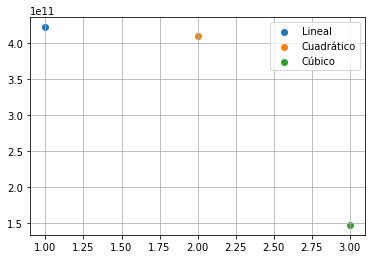

In [84]:
plt.figure()
plt.scatter(1,421560188103.0311, label = 'Lineal')
plt.scatter(2,408930401488.327, label = 'Cuadrático')
plt.scatter(3,148022208320.3791, label = 'Cúbico')
plt.grid()
plt.legend(loc='best')

# 2)

In [85]:
x = np.linspace(0,65,66)
y = data.Nacimientos.tolist()

In [86]:
m = len(y)
m

66

### Polinomio de grado 1

In [87]:
def funcion (beta, X, y):
    beta = np.reshape(beta,[2,-1]) # Ahora beta tiene dos elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([size,1]) #66 renglones y 1 columna
x_1 = np.reshape(x,[m,-1])
X = np.hstack((ones,x_1))

beta_inicial = np.random.rand(2) #Polinomio de grado 1 tiene dos elementos
y = np.reshape(y,[m,-1])

In [88]:
funcion(beta_inicial,X,y)

358556885183972.0

In [89]:
opt.minimize(funcion,beta_inicial,args=(X,y))

      fun: 4737918562498.449
 hess_inv: array([[ 2.96801546e-02, -6.79273993e-04],
       [-6.79273993e-04,  2.08842867e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 5
     njev: 14
   status: 0
  success: True
        x: array([1562381.44754827,   21990.12742321])

### Polinomio de grado 2

In [90]:
def funcion (beta, X, y):
    beta = np.reshape(beta,[3,-1]) # Ahora beta tiene tres elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([size,1]) #66 renglones y 1 columna
x_1 = np.reshape(x,[m,-1])
x_2 = np.reshape(x**2,[m,-1])
X = np.hstack((ones,x_1,x_2))

beta_inicial = np.random.rand(3) #Polinomio de grado 2 tiene tres elementos
y = np.reshape(y,[m,-1])

In [91]:
funcion(beta_inicial,X,y)

358219182162892.0

In [92]:
opt.minimize(funcion,beta_inicial,args=(X,y))

      fun: 492921365113.54987
 hess_inv: array([[ 6.30316291e-02, -3.82892896e-03,  4.85160583e-05],
       [-3.82892896e-03,  3.17398169e-04, -4.56422505e-06],
       [ 4.85160583e-05, -4.56422505e-06,  7.02651779e-08]])
      jac: array([    0.,  4096., 53248.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 148
      nit: 7
     njev: 35
   status: 2
  success: False
        x: array([ 1.02090685e+06,  7.27904841e+04, -7.81723481e+02])

### Polinomio de grado 3

In [93]:
def funcion (beta, X, y):
    beta = np.reshape(beta,[4,-1]) # Ahora beta tiene cuatro elementos
    y_pred = X @ beta
    return ((y-y_pred).T @ (y-y_pred))[0][0]

# Construyendo la matriz X
ones = np.ones([size,1]) #66 renglones y 1 columna
x_1 = np.reshape(x,[m,-1])
x_2 = np.reshape(x**2,[m,-1])
x_3 = np.reshape(x**3,[m,-1])
X = np.hstack((ones,x_1,x_2,x_3))

beta_inicial = np.random.rand(4) #Polinomio de grado 3 tiene cuatro elementos
y = np.reshape(y,[m,-1])

In [94]:
funcion(beta_inicial,X,y)

341638706422692.06

In [95]:
opt.minimize(funcion,beta_inicial,args=(X,y))

      fun: 441782385531.0968
 hess_inv: array([[ 3.55818616e-02, -1.13686838e-13, -4.57636808e-05,
         6.97787008e-07],
       [-1.13686838e-13,  1.42108547e-14, -5.27355937e-16,
         4.98732999e-18],
       [-4.57636808e-05, -5.27355937e-16,  1.76247172e-07,
        -2.71569137e-09],
       [ 6.97787008e-07,  4.98732999e-18, -2.71569137e-09,
         4.36179348e-11]])
      jac: array([      0.,       0.,   24576., 1466368.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 266
      nit: 9
     njev: 51
   status: 2
  success: False
        x: array([ 1.08847079e+06,  5.98563680e+04, -2.80886866e+02, -5.13455442e+00])

## Gráfico

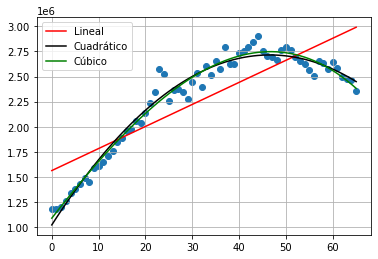

In [97]:
y_1 = 1562803.91979224 + 21979.81904837*x
y_2 = 1.02112414e+06 + 7.27774701e+04*x -7.81559834e+02*x**2
y_3 = 1.08846812e+06 + 5.98580182e+04*x -2.80956733e+02*x**2 -5.13382554e+00*x**3

plt.figure()
plt.scatter(x,y)
plt.plot(x,y_1, 'r', label='Lineal')
plt.plot(x,y_2, 'k', label='Cuadrático')
plt.plot(x,y_3, 'g', label='Cúbico')
plt.grid()
plt.legend(loc='best')

## Error acumulado

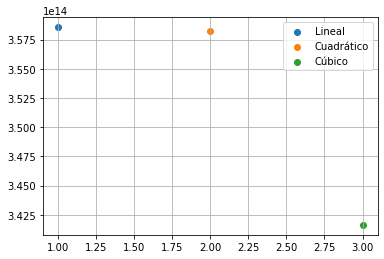

In [98]:
plt.figure()
plt.scatter(1,358556885183972.0, label = 'Lineal')
plt.scatter(2,358219182162892.0, label = 'Cuadrático')
plt.scatter(3,341638706422692.06, label = 'Cúbico')
plt.grid()
plt.legend(loc='best')